In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load dataset
# You can replace this URL with a local path if you have spam.csv downloaded
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
# Encode labels: 'ham' -> 0, 'spam' -> 1
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Display dataset info
print("\nDataset shape:", df.shape)
print(df['label'].value_counts())


Missing values per column:
label        0
message      0
label_num    0
dtype: int64

Dataset shape: (5572, 3)
label
ham     4825
spam     747
Name: count, dtype: int64


In [9]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 4457
Testing samples: 1115


In [11]:
# Convert text into numerical feature vectors using Bag-of-Words + TF-IDF
count_vect = CountVectorizer(stop_words='english')
tfidf_transformer = TfidfTransformer()

# Fit on training data
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Transform test data
X_test_tfidf = tfidf_transformer.transform(count_vect.transform(X_test))

print("Shape of TF-IDF training matrix:", X_train_tfidf.shape)

Shape of TF-IDF training matrix: (4457, 7403)


In [13]:
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

print("Model trained successfully!")

Model trained successfully!


Accuracy: 97.04%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



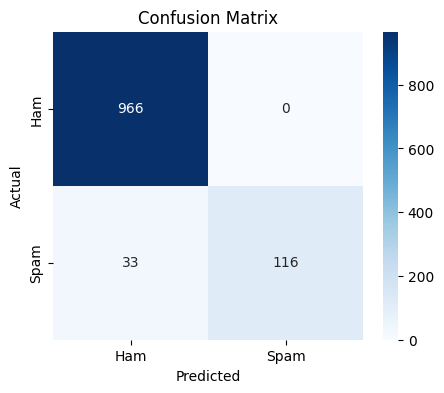

In [15]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Test on sample messages
samples = [
    "Win a free iPhone! Click here to claim your prize now.",
    "Are we still meeting for lunch today?",
    "URGENT! Your account has been compromised. Reset your password immediately!",
    "Hey, just checking in — how's your day going?"
]

sample_tfidf = tfidf_transformer.transform(count_vect.transform(samples))
predictions = model.predict(sample_tfidf)

for msg, label in zip(samples, predictions):
    print(f"\nMessage: {msg}\nPredicted: {'SPAM' if label==1 else 'HAM'}")


Message: Win a free iPhone! Click here to claim your prize now.
Predicted: SPAM

Message: Are we still meeting for lunch today?
Predicted: HAM

Message: URGENT! Your account has been compromised. Reset your password immediately!
Predicted: HAM

Message: Hey, just checking in — how's your day going?
Predicted: HAM
